In [108]:
class Linear_Regression():

  # initiating the parameters (learning rate & no. of iterations)
  def __init__(self, learning_rate, no_of_iterations):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations


  def fit(self, X, Y ):

    # number of training examples & number of features

    self.m, self.n = X.shape  # number of rows & columns

    # initiating the weight and bias

    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    # implementing Gradient Descent

    for i in range(self.no_of_iterations):
      self.update_weights()


  def update_weights(self):

    Y_prediction = self.predict(self.X)

    # calculate gradients

    dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m

    db = - 2 * np.sum(self.Y - Y_prediction)/self.m

    # upadating the weights

    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db


  def predict(self, X):

    return X.dot(self.w) + self.b

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [110]:
dataset = pd.read_csv('/content/salary_data.csv')

In [111]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [112]:
dataset.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [113]:
dataset.shape


(30, 2)

In [114]:
dataset.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [115]:
#Splitting the feature and target
X= dataset.iloc[:,:-1].values
Y= dataset.iloc[:,1].values

In [116]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [117]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [118]:
#splitting dataset into training and data
X_train , X_test , Y_train ,  Y_test = train_test_split(X,Y,test_size=0.3,random_state = 3)

In [119]:
#training the linear regression model
model = Linear_Regression(learning_rate=0.02 , no_of_iterations=1000)
model.fit(X_train , Y_train)

In [120]:
#printing the parameters values for weight and bias
print('weight=',model.w[0])
print('bias=',model.b)

weight= 9298.782440023235
bias= 27724.731042376385


In [121]:
#salary = 9514(experience) + 23697
test_data_prediction = model.predict(X_test)

In [122]:
print(test_data_prediction)

[ 73288.76499849  54691.20011844 101185.11231856 116063.1642226
  82587.54743851  69569.25202248  65849.73904647  41672.90470241
  75148.52148649]


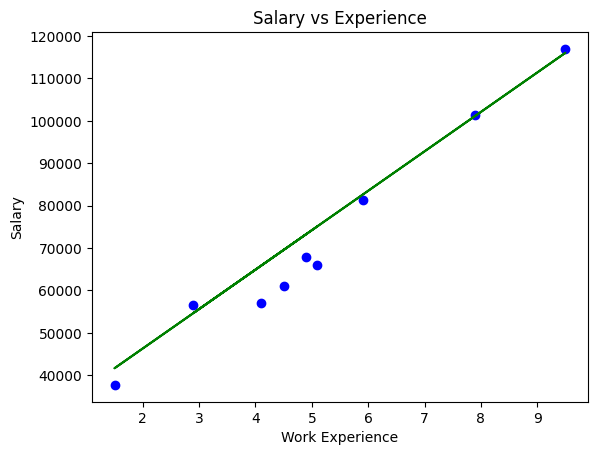

In [124]:
plt.scatter(X_test,Y_test,color='blue')
plt.plot(X_test,test_data_prediction,color='green')
plt.xlabel("Work Experience")
plt.ylabel("Salary")
plt.title('Salary vs Experience')
plt.show()